## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("ha_1.csv")
df.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [ ]:
X = df[["age","chol"]]
y = df["diagnosis"]

logreg_pipeline = Pipeline([
    ("logreg", LogisticRegression(max_iter=1000))  # Logistic Regression with increased iterations for convergence
])

coef1= logreg_pipeline.fit(X,y).named_steps["logreg"].coef_[0][0]
coef2= logreg_pipeline.fit(X,y).named_steps["logreg"].coef_[0][1]
print(coef1)
print(coef2)

inter= logreg_pipeline.fit(X,y).named_steps["logreg"].intercept_[0]
print(inter)
n=.9
age=55
log1=n/(1-n)


#itercept+55*ceof1+x*coef2=log(.9/.1)
p=inter+(coef1*age)
print(p)
log=np.log(log1)
print(log)
ans=log-p
print(ans/coef2)

0.04686330613036339
0.001801238519029292
-3.2401122588588933
-0.662630421688907
2.1972245773362196
1587.7158792752973


In [ ]:
n=.5
age=55
log1=n/(1-n)


#itercept+55*ceof1+x*coef2=log(.9/.1)
p=inter+(coef1*age)
print(p)
log=np.log(log1)
print(log)
ans=log-p
print(ans/coef2)

-0.662630421688907
0.0
367.87488979860706


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
X = df[["age","chol"]]
y = df["diagnosis"]

lda_pipeline = Pipeline([
    ("lda", LinearDiscriminantAnalysis())  # Logistic Regression with increased iterations for convergence
])

coef1= lda_pipeline.fit(X,y).named_steps["lda"].coef_[0][0]
coef2= lda_pipeline.fit(X,y).named_steps["lda"].coef_[0][1]
print(coef1)
print(coef2)

inter= lda_pipeline.fit(X,y).named_steps["lda"].intercept_[0]
print(inter)
n=.9
age=55
log1=n/(1-n)


#itercept+55*ceof1+x*coef2=log(.9/.1)
p=inter+(coef1*age)
print(p)
log=np.log(log1)
print(log)
ans=log-p
print(ans/coef2)

0.04655743553694484
0.0017896671039291314
-3.2196776604068784
-0.6590187058749124
2.1972245773362196
1595.963448699695


lda not usually the best

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
X = df[["age","chol"]]
y = df["diagnosis"]

svc_pipeline = Pipeline([
    ("svc", SVC(kernel='linear', probability=True))  # Logistic Regression with increased iterations for convergence
])

param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(svc_pipeline, param_grid, cv=5)
grid_search.fit(X, y)

# Best model
best_svc = grid_search.best_estimator_.named_steps["svc"]

# Coefficients and intercept
coef1 = best_svc.coef_[0][0]  # Coefficient for age
coef2 = best_svc.coef_[0][1]  # Coefficient for chol
intercept = best_svc.intercept_[0]

inter= svc_pipeline.fit(X,y).named_steps["svc"].intercept_[0]
print(inter)
n=.9
age=55
log1=n/(1-n)


#itercept+55*ceof1+x*coef2=log(.9/.1)
p=inter+(coef1*age)
print(p)
log=np.log(log1)
print(log)
ans=log-p
print(ans/coef2)

-4.686034055211244
-1.1441417032632932
2.1972245773362196
912.7734248391982


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

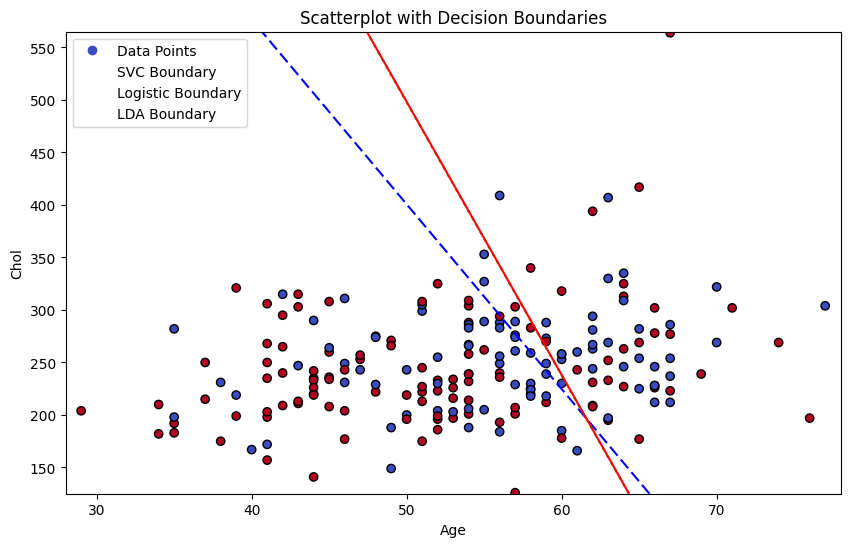

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline

# Map labels to numeric values
y_numeric = np.where(df["diagnosis"] == "Disease", 1, 0)

# Define X and y
X = df[["age", "chol"]].values
y = y_numeric

# Fit SVC (linear kernel)
svc_pipeline = Pipeline([
    ("svc", SVC(kernel="linear", probability=True))
])
svc_pipeline.fit(X, y)
svc_model = svc_pipeline.named_steps["svc"]

# Fit Logistic Regression
logistic_pipeline = Pipeline([
    ("logistic", LogisticRegression(max_iter=1000))
])
logistic_pipeline.fit(X, y)
logistic_model = logistic_pipeline.named_steps["logistic"]

# Fit LDA
lda_pipeline = Pipeline([
    ("lda", LinearDiscriminantAnalysis())
])
lda_pipeline.fit(X, y)
lda_model = lda_pipeline.named_steps["lda"]

# LDA coefficients
coef1_lda = lda_model.coef_[0][0]
coef2_lda = lda_model.coef_[0][1]
intercept_lda = lda_model.intercept_[0]

# Create a meshgrid for plotting the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Decision boundaries
Z_svc = svc_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_svc = Z_svc.reshape(xx.shape)

Z_logistic = logistic_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_logistic = Z_logistic.reshape(xx.shape)

# LDA decision boundary equation: coef1 * x1 + coef2 * x2 + intercept = 0
Z_lda = coef1_lda * xx + coef2_lda * yy + intercept_lda

# Plot
plt.figure(figsize=(10, 6))

# Scatterplot of the data
scatter = plt.scatter(
    X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k", label="Data Points"
)
plt.xlabel("Age")
plt.ylabel("Chol")

# Plot decision boundary for SVC
svc_contour = plt.contour(
    xx, yy, Z_svc, levels=[0], colors="blue", linestyles="--", label="SVC Boundary"
)

# Plot decision boundary for Logistic Regression
logistic_contour = plt.contour(
    xx, yy, Z_logistic, levels=[0], colors="green", linestyles=":", label="Logistic Boundary"
)

# Plot decision boundary for LDA
lda_contour = plt.contour(
    xx, yy, Z_lda, levels=[0], colors="red", linestyles="-", label="LDA Boundary"
)

# Add a manual legend
plt.legend(
    [scatter.legend_elements()[0][0], svc_contour.collections[0], logistic_contour.collections[0], lda_contour.collections[0]],
    ["Data Points", "SVC Boundary", "Logistic Boundary", "LDA Boundary"],
    loc="upper left"
)

plt.title("Scatterplot with Decision Boundaries")
plt.show()
